In [81]:
# import necessary packages
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt


from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.tree import DecisionTreeRegressor # Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #model evaluation
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix



%matplotlib inline


In [382]:
pd.set_option('display.max_columns', None)
dataCurrent = pd.read_csv("/Users/aidanwall/Documents/CPSC_Courses/CPSC_392/final-world-happiness-report-2021.csv")
dataHistorical = pd.read_csv("/Users/aidanwall/Documents/CPSC_Courses/CPSC_392/world-happiness-report.csv")
# dataHistorical = dataHistorical.sort_values(by=['Life Ladder'], ascending=True).dropna()
dataHistorical = dataHistorical.sort_values(by=['year'], ascending=True).dropna()
dataCurrent = dataCurrent.sort_values(by=['Ladder score'], ascending=False)
dataHistorical.head(10)
# dataCurrent.head(25)
# dataHistorical.describe


# zscore = StandardScaler()
# dataHistorical.columns
# lr = LogisticRegression()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
293,Canada,2005,7.418,10.652,0.962,71.30,0.957,0.256,0.503,0.839,0.233
1409,Portugal,2006,5.405,10.360,0.905,69.84,0.882,-0.179,0.880,0.709,0.333
1509,Sierra Leone,2006,3.628,7.136,0.561,40.30,0.679,0.101,0.836,0.505,0.381
327,Chile,2006,6.063,9.850,0.836,68.66,0.744,0.168,0.634,0.804,0.348
1482,Senegal,2006,4.417,7.881,0.760,53.38,0.736,-0.051,0.805,0.740,0.225
1440,Russia,2006,4.964,9.991,0.895,58.68,0.643,-0.307,0.935,0.611,0.232
357,Colombia,2006,6.025,9.277,0.910,65.22,0.805,-0.015,0.808,0.800,0.326
313,Chad,2006,3.435,7.360,0.724,43.18,0.306,0.028,0.961,0.580,0.263
1581,South Korea,2006,5.332,10.310,0.775,70.20,0.715,-0.052,0.799,0.651,0.338
1546,Slovenia,2006,5.811,10.403,0.936,68.00,0.936,0.043,0.708,0.652,0.307


1)
What are main factors that contribute to a country's happiness and which is the most important? How is this determined  and how well did the model perform?

In [586]:
zscoreHist = ['Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']


histColumns = [ 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
X = dataHistorical[histColumns]
y = dataHistorical['Life Ladder']
lr = LinearRegression()
zscore = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
Xz_train = zscore.fit_transform(X_train)    
Xz_test = zscore.transform(X_test)
lr.fit(Xz_train,y_train)
predictedVals = lr.predict(Xz_test) #predict
print("r2 score: ",r2_score(y_test, predictedVals))
print("MSE: ", mean_squared_error(y_test, lr.predict(Xz_test)))

n=0
for i in histColumns:
    print("feature coefficient ",histColumns[n],": ",lr.coef_[n])
    n=n+1

coefficients = pd.DataFrame({"predictor":histColumns,"COEF":lr.coef_}) 
# coefficients = coefficients.append({"predictor":"intercept","COEF":lr.intercept_}) 
coefficients.head(20) 


r2 score:  0.7690904095592163
MSE:  0.3115397777575471
feature coefficient  Log GDP per capita :  0.41586532948828125
feature coefficient  Social support :  0.28670015782867214
feature coefficient  Healthy life expectancy at birth :  0.22430131285941252
feature coefficient  Freedom to make life choices :  0.12398471438590423
feature coefficient  Generosity :  0.1073798298496379
feature coefficient  Perceptions of corruption :  -0.1329733932259871


,predictor,COEF
0,Log GDP per capita,0.415865
1,Social support,0.286700
2,Healthy life expectancy at birth,0.224301
3,Freedom to make life choices,0.123985
4,Generosity,0.107380
5,Perceptions of corruption,-0.132973


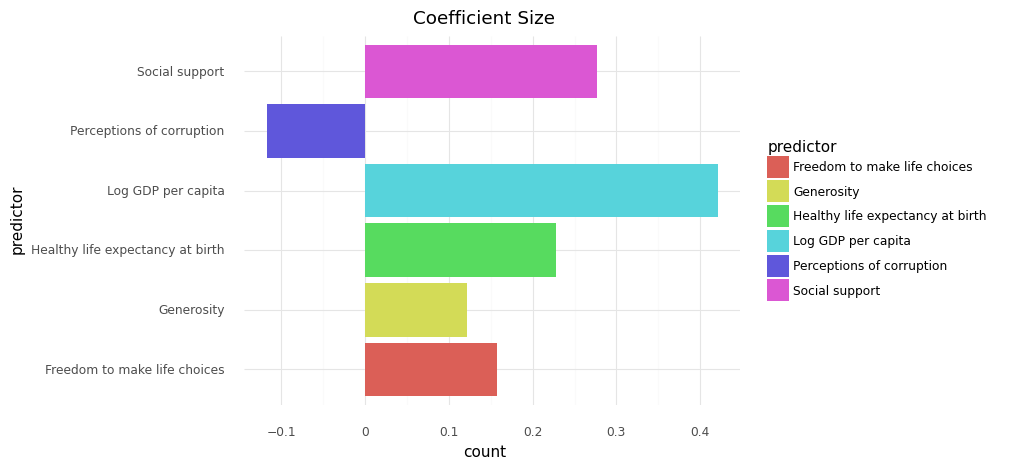

<ggplot: (-9223372036533251068)>

In [573]:
ggplot(coefficients,aes(x="predictor", weight="COEF",fill = "predictor")) +theme_minimal()+ geom_bar() + coord_flip() +ggtitle("Coefficient Size")



In [507]:
pca = PCA()
pca.fit(Xz_train)

pcaDF = pd.DataFrame({"expl_var" : pca.explained_variance_ratio_, "pc": range(1,7), "cum_var": 
                      pca.explained_variance_ratio_.cumsum()})
pcaDF.head(10)


,expl_var,pc,cum_var
0,0.499612,1,0.499612
1,0.225217,2,0.724829
2,0.108348,3,0.833177
3,0.086293,4,0.919470
4,0.060844,5,0.980314
5,0.019686,6,1.000000


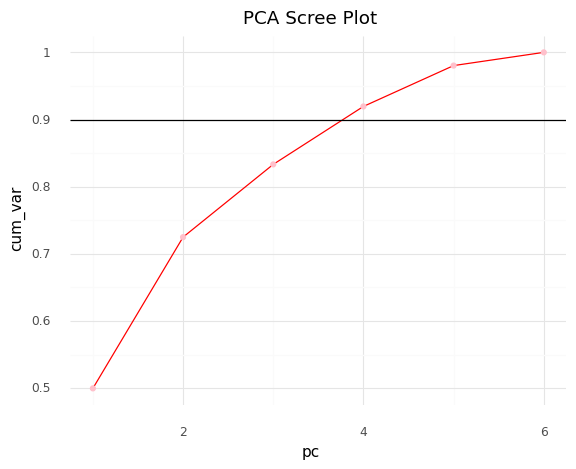

<ggplot: (321449385)>

In [572]:

(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "red") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.9)) + theme_minimal()+ggtitle("PCA Scree Plot")

1)
After building a linear regression model
Log GDP and Social Support are two largest factors in determining happiness. 

I standardized my data by z-scoring my predictors (after the Train Test Split with a .8/.2 split, meaning 20% of the data is saved for testing the model, and 80% is used in training thee model
), and built a linear regression model to predict happiness score based on these predictors:

['Log GDP per capita',  'Social support', 'Healthy life expectancy at birth',  'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

Our model performed pretty well, giving us an R2 score of 0.771 or about 77% of the variance in Happiness Score is predictable from our model and the variables in it . Because all of our predictor variables are now on the same scale, we can look at the coefficient of each predictor in our linear regression model to see which has the largest effect on happiness score. As shown by the graph comparing the size of each coefficient we can see that Log GDP per capita has the largest effect on happiness. This is not surprising given that almost all basic human needs(such as food, water, electricity) rely on money and wealth determines who gets access to these resources and it is very hard to be happy without any of these things. The factor with the second largest factor on happiness score is social support. The factor with the least impact on happiness score was Perception of corruption. 

I then ran principal component analysis to see how much each predictor accounted for the variance of happiness score, and to see if I wanted to eliminate any predictors from my model. I then built a scree plot that shows the principal components used on the X-axis and the cumulative variance on the Y axis. I also have an intercept at .9 that tells us that the first 4 principal components account for over 90% of the variance in Happiness Score. Since there is no “elbow” in the graph, and not too much difference in feature importance, I will keep all variables in my model as I believe there is no benefit to removing any. The first 2 features account for just under 75% of the variance, meaning these are the two most important features. 




2)
Are there any signs that individual countries or groups are happy with less social support, or generosity, money, etc. and are just more genuinely happy?

I will use a clustering algorithm to compare happiness to other factors such as GDP,  'Social support', 'Healthy life expectancy at birth',  'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', to see if there are any distinct clusters and if there are groups of people who are happy with more of something, less of something or anywhere in between.

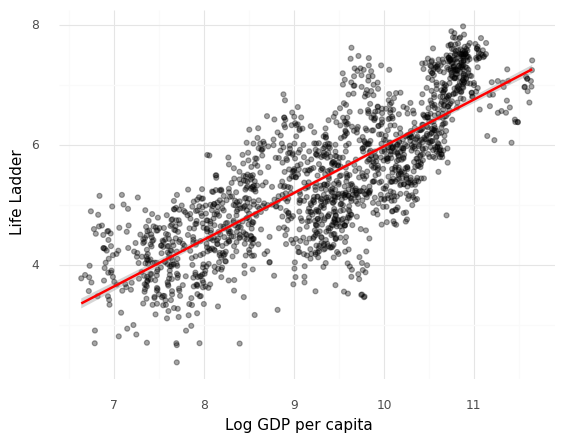

<ggplot: (-9223372036535642445)>

In [574]:
# ggplot(dataHistorical,aes(x="Log GDP per capita",y="Life Ladder"))+geom_point()+theme_minimal()+stat_smooth(color = "red")


ggplot(dataHistorical,aes(x="Log GDP per capita",y="Life Ladder"))+geom_point(alpha = .35)+theme_minimal()+geom_smooth(color = "red")

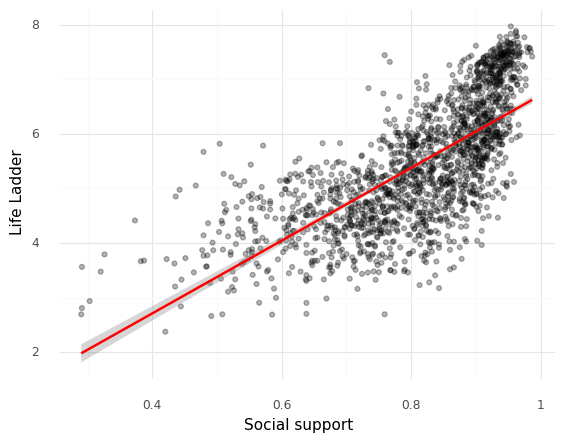

<ggplot: (324072610)>

In [452]:
ggplot(dataHistorical,aes(x="Social support",y="Life Ladder"))+geom_point(alpha=.3)+theme_minimal()+stat_smooth(color = "red")

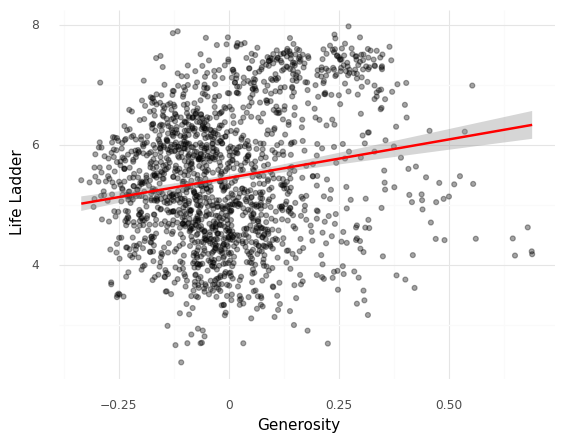

<ggplot: (-9223372036533367015)>

In [512]:
ggplot(dataHistorical,aes(x="Generosity",y="Life Ladder"))+geom_point(alpha = .35)+theme_minimal()+stat_smooth(color = "red")

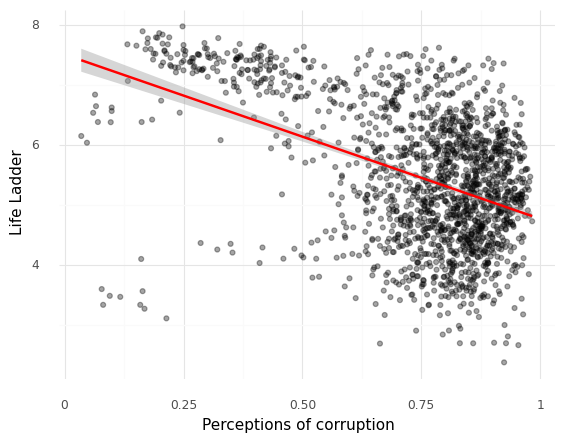

<ggplot: (321964783)>

In [513]:
ggplot(dataHistorical,aes(x="Perceptions of corruption",y="Life Ladder"))+geom_point(alpha=.35)+theme_minimal()+stat_smooth(color = "red")
# +stat_summary(geom = "smooth")

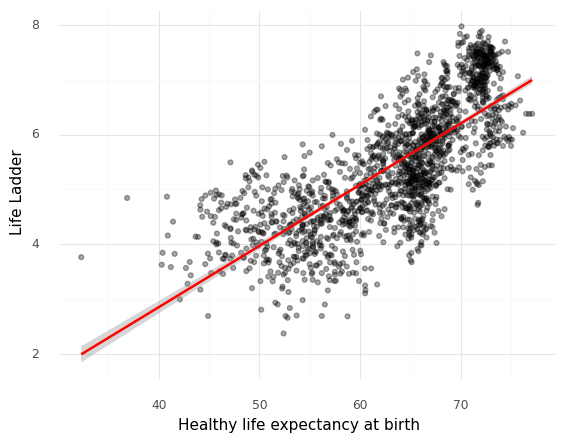

<ggplot: (318925544)>

In [514]:
ggplot(dataHistorical,aes(x="Healthy life expectancy at birth",y="Life Ladder"))+geom_point(alpha = .35)+theme_minimal()+stat_smooth(color = "red")


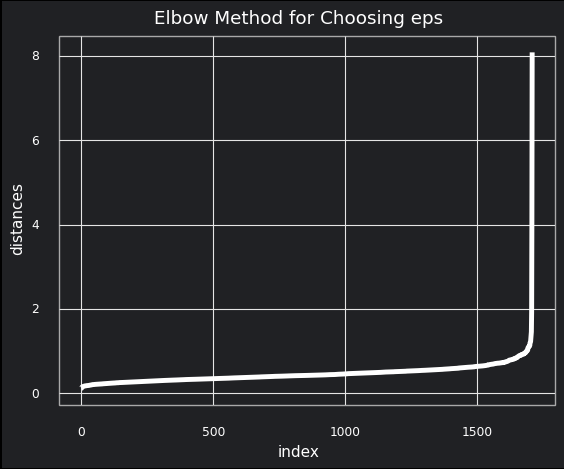

<ggplot: (-9223372036531937350)>

In [523]:
col = ['Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption',"Life Ladder"]
dbData = dataHistorical[col]
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 3
nn = NearestNeighbors(mins + 1)

nn.fit(dbData)

distances, neighbors = nn.kneighbors(dbData)

distances
distances = np.sort(distances[:, mins], axis = 0)
#plot the distances
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt1 = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt1, filename='elbow.png', dpi=300)

plt1

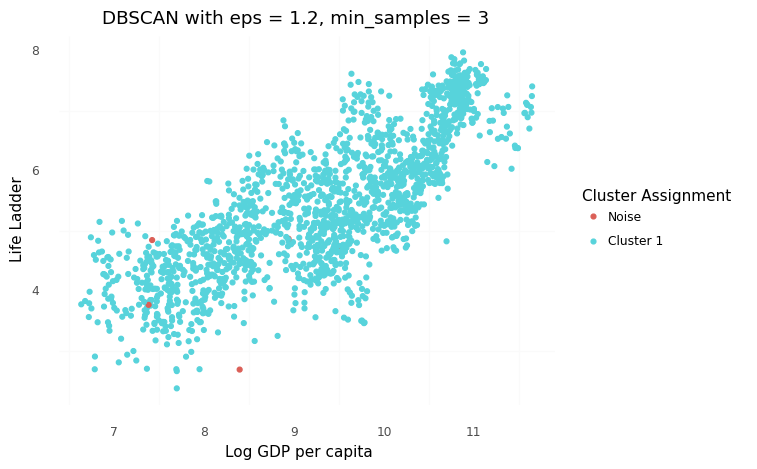

<ggplot: (321448119)>

In [528]:
db = DBSCAN(eps = 1.2, min_samples = 3).fit(dbData)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db.labels_)))]

dbData["assignments"] = db.labels_

(ggplot(dbData, aes(x = "Log GDP per capita", y = "Life Ladder", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 1.2, min_samples = 3 "))

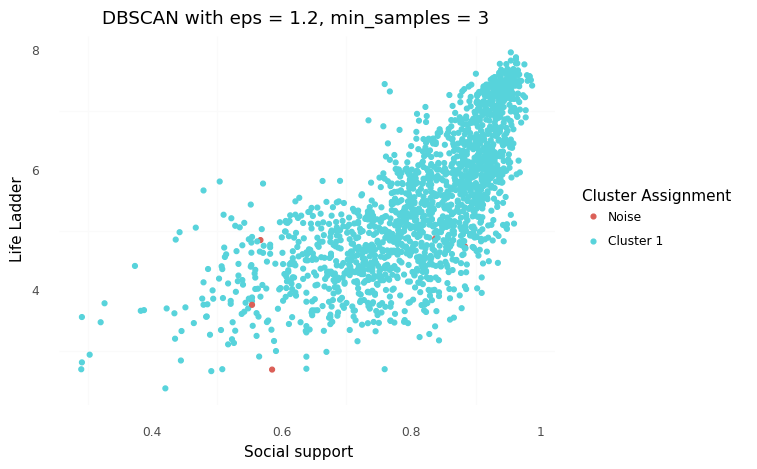

<ggplot: (318712924)>

In [529]:
(ggplot(dbData, aes(x = "Social support", y = "Life Ladder", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 1.2, min_samples = 3 "))

In [531]:
print("silhouette score: ",silhouette_score(dbData, dbData["assignments"]))

silhouette score:  0.509208482076072


In [534]:
hacData = dataHistorical[col]
hac = AgglomerativeClustering(n_clusters = 3,
                              affinity = "euclidean",
                             linkage = "ward")
hac.fit(hacData)
membership = hac.labels_
membership
print("silhouette score: ",silhouette_score(hacData,membership))
hacData["cluster3"] = membership

silhouette score:  0.5228876192122112


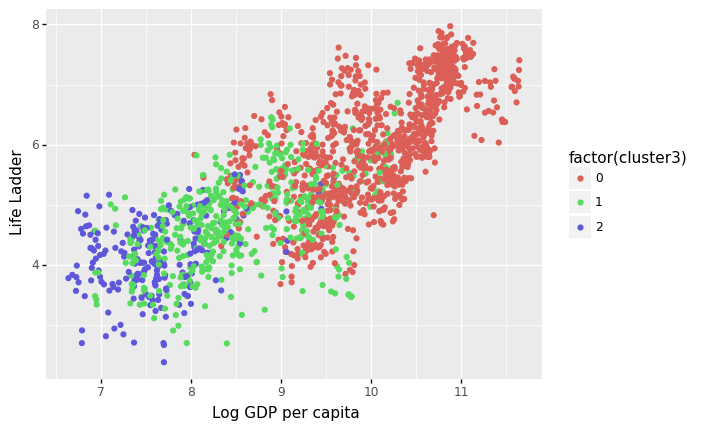

<ggplot: (-9223372036532011481)>


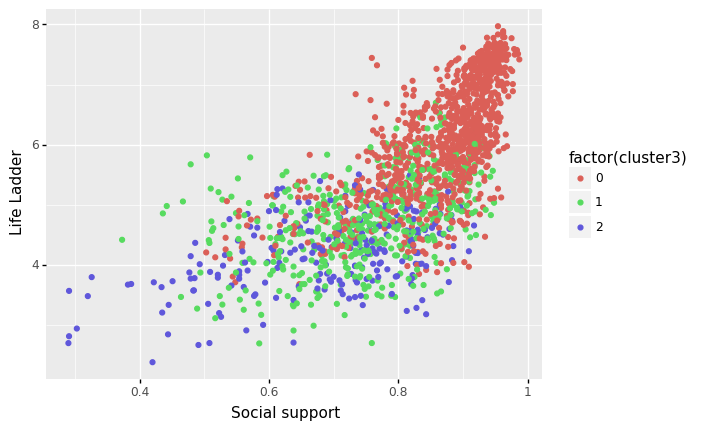

<ggplot: (-9223372036532011425)>


In [539]:
ggHAC3=(ggplot(hacData, aes(x = "Log GDP per capita", y = "Life Ladder")) + geom_point(aes(color = "factor(cluster3)")))
ggHAC4=(ggplot(hacData, aes(x = "Social support", y = "Life Ladder")) + geom_point(aes(color = "factor(cluster3)")))
print(ggHAC3)
print(ggHAC4)

0.5481018757274829


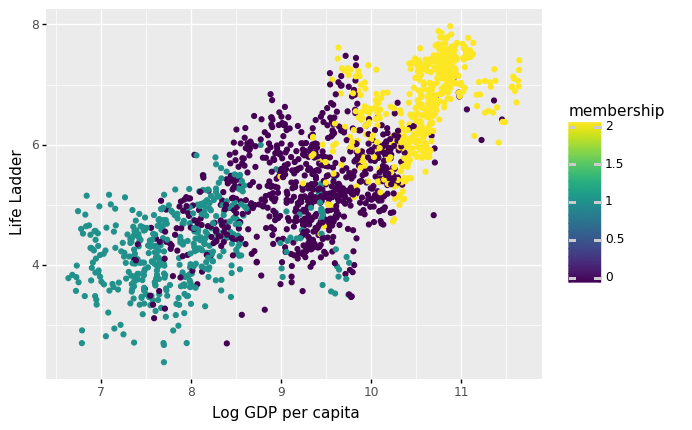

<ggplot: (319012493)>


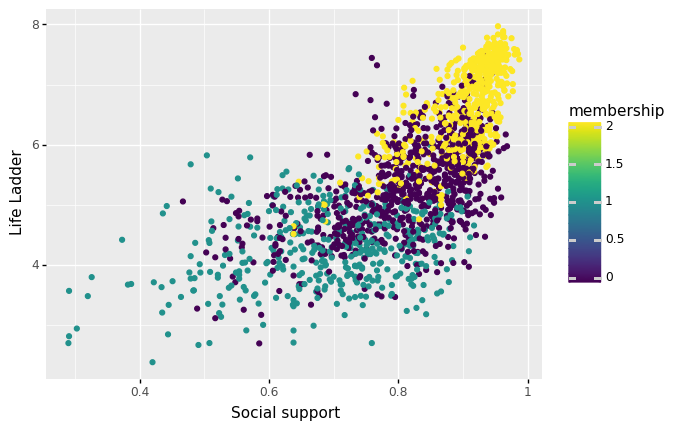

<ggplot: (-9223372036535763319)>


In [540]:
EMD = hacData

km = KMeans(n_clusters = 3)
km.fit(EMD)

membership = km.predict(EMD)

EMD["cluster"] = membership

print(silhouette_score(EMD, membership))
gg3=(ggplot(EMD, aes(x = "Log GDP per capita", y = "Life Ladder", color = "membership")) + geom_point())
gg33=(ggplot(EMD, aes(x = "Social support", y = "Life Ladder", color = "membership")) + geom_point())

print(gg3)
print(gg33)

2)Are there any signs that individuals are happy with less social support, or generosity, money, etc. and are just more genuinely happy?

After graphing all variables and their relationship with Life Ladder Score, I do not see any clear clusters shapes in any of my relationships. A lot of the relationships seem to be very linear. I will try to use a couple different Clustering Algorithms to see if they can find any clusters and see what the silhouette score is. I will try DBScan because not every point is included and it accounts for noise (data points that are not in any cluster, sort of like outliers). It also does not have a specific shape either so it would be useful because we have 3 different shapes included. Only downfall is if points are close to each other it can sometimes mix clusters together. I used nearest neighbor of 3 values because we do not have that many data points and this allowed me to build an elbow graph. I used the elbow method to calculate what EPS to pass into my model which was around 1.8. Using DBScan gave me a silhouette score of 0.5092 or around 50% which may be deceptively high. Silhouette score tells us how well clusters are separated apart from each other and clearly distinguished. This is not too high of a silhouette score and as shown when plotting GDP Vs Happiness Score, there are no distinct clusters, and the model only sees one cluster, with a couple noisey data points. 


I will also try Hierarchical Clustering because it does not make an assumption of shape. This algorithm also gives us flexibility in choosing the amount of clusters, which I have decided to use 3, to try and find differences between Poor Wealthy and Average nations, which is useful because we have an idea of how many clusters we want to start with. A con is that if it murges data points successively, then they may group points that are close together even though we might want them to be in different clusters. If datapoints/clusters are super close together, this might not be the best clustering algorithm. I used the euclidian distance metric and gave told it to find 3 clusters. When I plot these results, there overlap when comparing GDP and Happiness Score and a lot of overlap when comparing Social Support and Happiness, there is no distinction between the clusters. The Silhouette score is higher than DBScan, but when looking at the model graphed, it still does not help us achieve our goal.

I also decided to build a kmeans model. It makes assumption of spherical clusters (very restricting shape). Our data is not necessarily spherical. K means is useful when using a small amount of variables, which we are, so that is an pro in using k-means. Another pro is that we have control of how many clusters we want, so after looking at the data we would be able to better our model and choose 3. A con is that it uses hard assignment, so it either puts a point in one cluster or another. It also does not account for noise, as all data points have to be included in the model. This is not any better, giving us a silhouette score of 0.5481018757274829.

There are no signs that individual countries are happier with any less GDP or Social Support, or there are no distinct groups when comparing any variable to happiness score. They allseem to have a slight linear or no relationship at all. Except for GDP and Happiness, there is a strong upwards correaltion between GDP per capita and Happiness Score, which makes sense because you need basic necessities to be happy, and if you have no money you cannot buy these basic necessities, and therefore endure many hardships that stop you from achieving this happiness, including no access to clean water, food, medical care, etc. 

3) Look at the correlation between GDP and perception corruption, does it occur in poorer, or richer countries, or both, or in some regions?


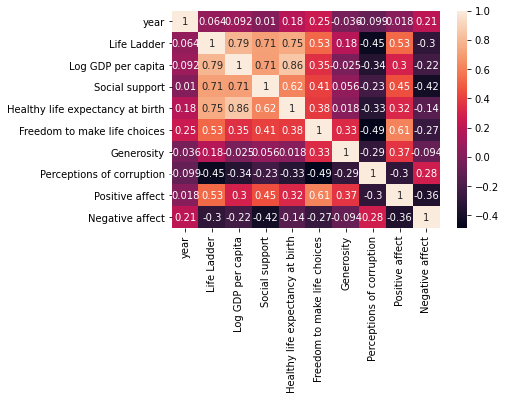

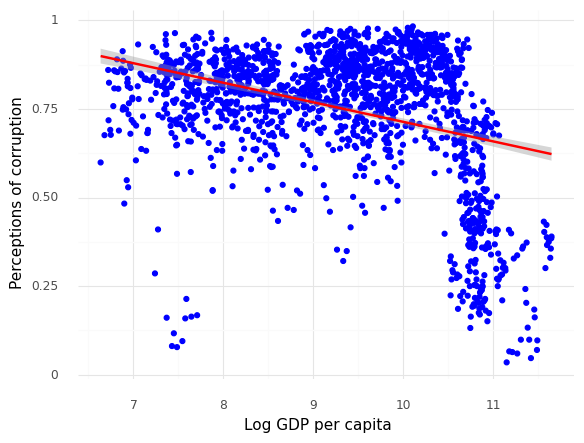

<ggplot: (322949787)>


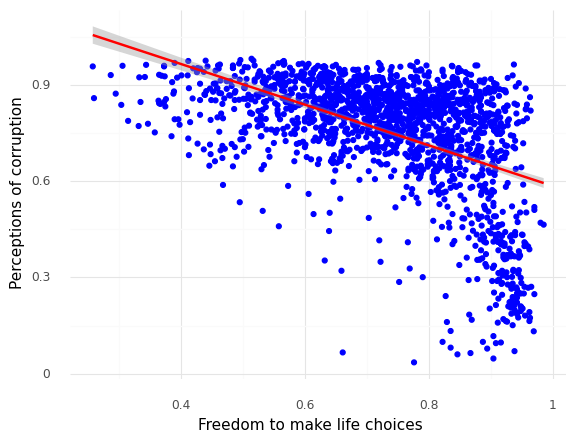

<ggplot: (-9223372036529636990)>


In [576]:
ggQ3=ggplot(dataHistorical,aes(x="Log GDP per capita",y="Perceptions of corruption"))+geom_point(color = 'blue')+theme_minimal() +geom_smooth(color = "red")
ggQ33=ggplot(dataHistorical,aes(x="Freedom to make life choices",y="Perceptions of corruption"))+geom_point(color = 'blue')+theme_minimal() +geom_smooth(color = "red")

corrMatrix = dataHistorical.corr()
sn.heatmap(corrMatrix, annot=True)
plt
print(ggQ3)
print(ggQ33)


There seems to be a negative correlation between GDP and perceptions of corruption, as GDP increases, perception of corruption decreases, with it being very low at the countries with the highest Log GDP per capita. The variable with the largest effect on "Perception of corruption" is 'Freedon to make life choices" with a value of -.49 in the correlation matrix. This value is higher than that of GDP per capita which has a correlation of -0.34.


The graph is interesting, because it shows us that pretty much all countries, except the very very wealthy(and there seems to be a clear cutoff) have a very high perception of corruption in their country. It is suprsising that so many countries had such high perceptions of corruption in their country. The last graph shows the relationship between "Freedom to make life choices" and "Perception of corruption" which looks very similar to the graph comapring GDP and "Perception of corruption". It shows that when people do not have the freedom to make life choices they perceive there is more corruption in their government. It also shows us that people at the very far right side, who have lots of freedom to make life choices also have no perception of corruption in their government. This might be because there is more corruption in non-democracies, or that corruption and democracy are inversely related.  

4) what are the happiest 10 countries, what are the 10 least happy countries? Have they always been historically the happiest? Compare this to data from when data starts (2005)

  Country name  Ladder score
0      Finland         7.842
1      Denmark         7.620
2  Switzerland         7.571
3      Iceland         7.554
4  Netherlands         7.464
5       Norway         7.392
6       Sweden         7.363
7   Luxembourg         7.324
8  New Zealand         7.277
9      Austria         7.268


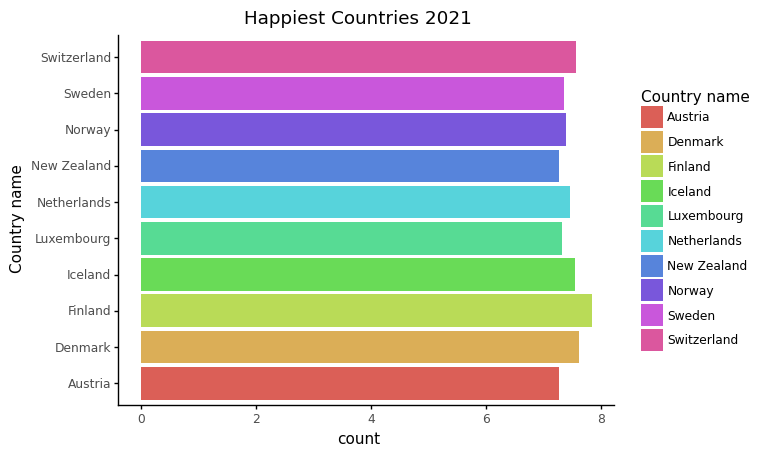

<ggplot: (319013647)>
  Country name  Ladder score
0      Burundi         3.775
1        Yemen         3.658
2     Tanzania         3.623
3        Haiti         3.615
4       Malawi         3.600
5      Lesotho         3.512
6     Botswana         3.467
7       Rwanda         3.415
8     Zimbabwe         3.145
9  Afghanistan         2.523


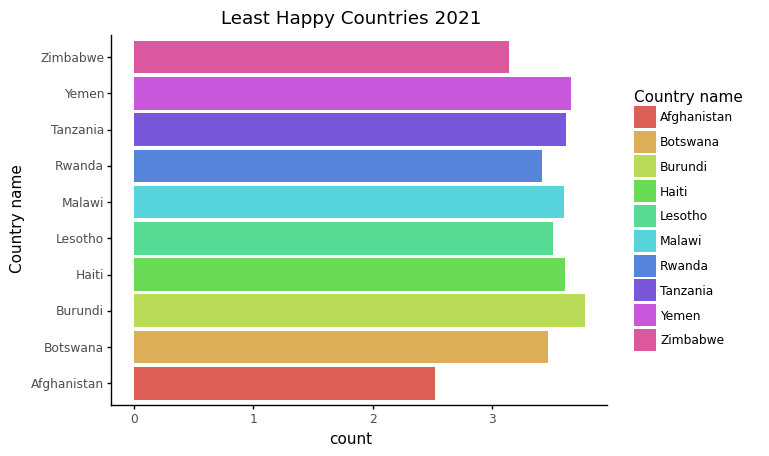

<ggplot: (-9223372036529517438)>


In [549]:
dfMAX= dataCurrent.groupby(['Country name'], sort=False)['Ladder score'].max().head(10) 
dfMIN= dataCurrent.groupby(['Country name'], sort=False)['Ladder score'].min().tail(10) 
dfMAX = dfMAX.reset_index(drop=False)
dfMIN = dfMIN.reset_index(drop=False)
print(dfMAX)
g1 = ggplot(dfMAX,aes(x='Country name',weight='Ladder score',fill = 'Country name')) + theme_classic()+geom_bar()+ coord_flip() +ggtitle("Happiest Countries 2021")


print(g1)
g2 = ggplot(dfMIN,aes(x='Country name',weight='Ladder score',fill = 'Country name')) + theme_classic()+geom_bar()+ coord_flip() +ggtitle("Least Happy Countries 2021")

print(dfMIN)
print(g2)



    Country name  Life Ladder
59       Finland        7.672
19   Switzerland        7.473
50        Norway        7.416
56   New Zealand        7.305
41       Ireland        7.144
..           ...          ...
44       Georgia        3.675
1   Sierra Leone        3.628
6           Chad        3.435
13         Benin        3.330
12          Togo        3.202

[74 rows x 2 columns]


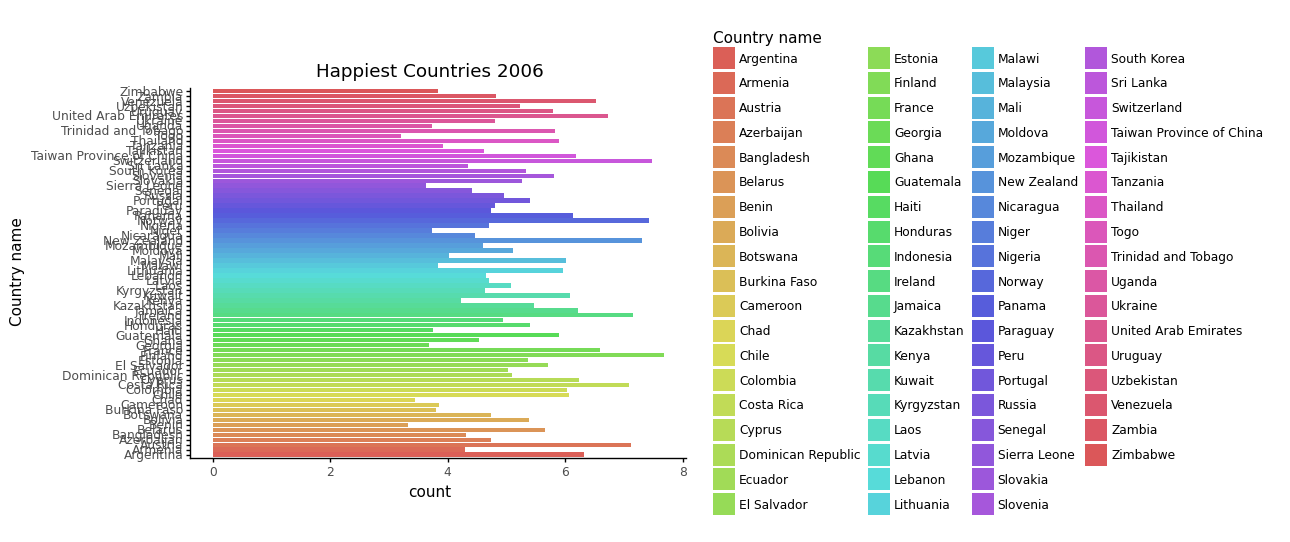

<ggplot: (322246625)>
           Country name  Life Ladder
2              Zimbabwe        3.826
3               Armenia        4.289
0            Azerbaijan        4.728
6                Zambia        4.824
8            Uzbekistan        5.232
1               Uruguay        5.786
5             Argentina        6.313
9             Venezuela        6.525
7  United Arab Emirates        6.734
4               Austria        7.122


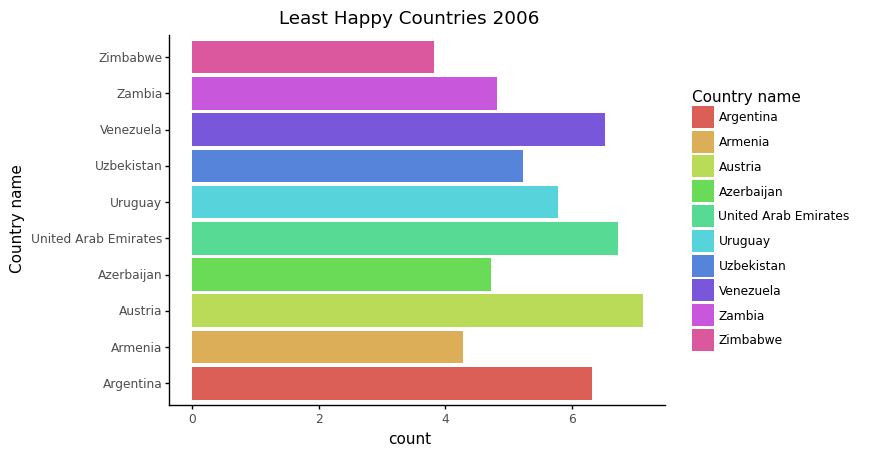

<ggplot: (-9223372036533362558)>


In [582]:
data2006 = dataHistorical[dataHistorical['year']==2006]
# data2006.head(100)
MAX2006= data2006.groupby(['Country name'], sort=False)['Life Ladder'].max() 
MIN2006= data2006.groupby(['Country name'], sort=False)['Life Ladder'].min().tail(10) 
MAX2006 = MAX2006.reset_index(drop=False)
MIN2006 = MIN2006.reset_index(drop=False)
# df.sort_values(by=['col1'])
MAX2006 = MAX2006.sort_values(by=['Life Ladder'],ascending=False)
print(MAX2006)
# MAX2006 = MAX2006.head(10)
g12 = ggplot(MAX2006,aes(x='Country name',weight='Life Ladder',fill = 'Country name')) + theme_classic()+geom_bar()+ coord_flip() +ggtitle("Happiest Countries 2006")


print(g12)
g23 = ggplot(MIN2006,aes(x='Country name',weight='Life Ladder',fill = 'Country name')) + theme_classic()+geom_bar()+ coord_flip() +ggtitle("Least Happy Countries 2006")

print(MIN2006.sort_values(by=['Life Ladder']))
print(g23)



5) 
How would the model perform if GDP/any variable associated with money was not considered? (only look at freedom to make choices, generosity, etc.) Look at R2 score and MSE and compare.


r2 score:  0.7117630487584501
MSE:  0.3784311860878101


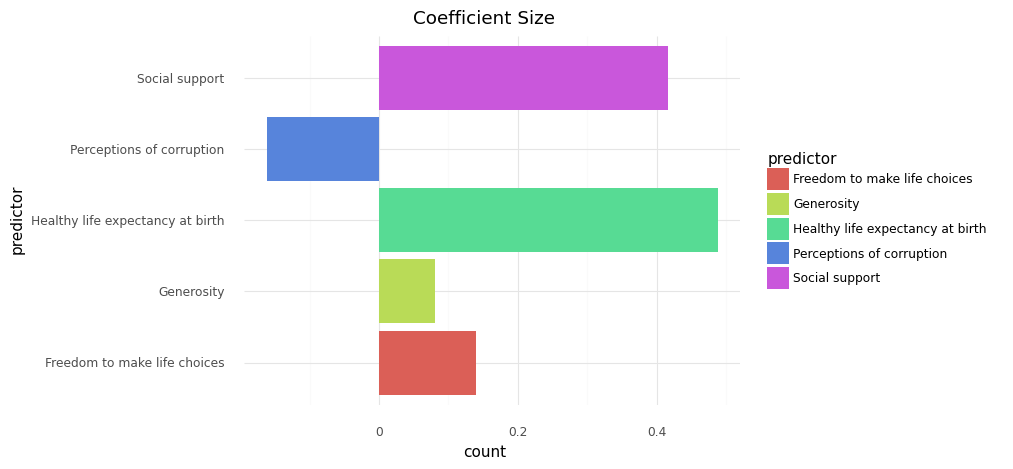

<ggplot: (-9223372036535850443)>

In [237]:
nonMon = ['Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
X_NM = dataHistorical[nonMon]
lr1 = LinearRegression()

X1_train, X1_test, y1_train, y1_test = train_test_split(X_NM, y, test_size=0.2)
Xz1_train = zscore.fit_transform(X1_train)    
Xz1_test = zscore.transform(X1_test)
# X_train.head()
# data.head()
lr1.fit(Xz1_train,y1_train)


predictedVals1 = lr1.predict(Xz1_test) #predict

# print(predictedVals)
# print("score: ",lr1.score(Xz1_test,y1_test))
print("r2 score: ",r2_score(y1_test, predictedVals1))
print("MSE: ", mean_squared_error(y1_test, lr1.predict(Xz1_test)))


coefficients1 = pd.DataFrame({"predictor":nonMon,"COEF":lr1.coef_})

ggplot(coefficients1,aes(x="predictor", weight="COEF",fill = "predictor")) +theme_minimal()+ geom_bar() + coord_flip() +ggtitle("Coefficient Size")



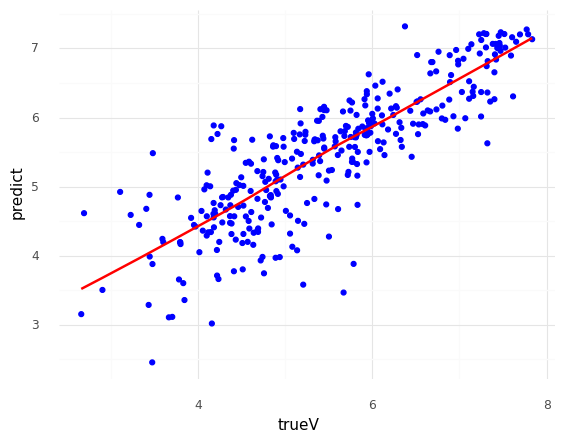

<ggplot: (-9223372036532979950)>

In [243]:
true_vs_pred = pd.DataFrame({"predict": predictedVals1,"trueV": y1_test})
true_vs_pred.head()

(ggplot(true_vs_pred, aes(x = "trueV", y = "predict")) + geom_point(color='blue')) + theme_minimal() +stat_smooth(color = "red")

5) How would the model perform if GDP/any variable associated with money was not considered? (only look at freedom to make choices, generosity, etc.) Look at R2 score and MSE and compare.

I built a new linear regression model and removed GDP from my predictors, so it only has non monetary predictors. I did Train Test Split then z-scored my x variables, and got a R2 score of ~.72 or 72%. This is compared to the R2 score with GDP as a variable of .77. There is a decrease in our R2 score of ~.05. This is not ginormous, but still slightly significant. I would not adapt this new model and would choose the one with all factors. When comparing Mean Squared Error, we have an MSE of 0.378431 from our new model and 0.301614588 with our original model. This means that the average error squared of our prediction increased by .07 when trying to predict Happiness Score. What is interesting in this model is that now “Healthy life expectancy at birth” now has the largest effect on predicting happiness score. In the first model, GDP per capita was the largest impact on Happiness Score, and “Social Support” had the second largest impact. Now, when GDP is not in the model, “Healthy life expectancy at birth”  has the largest effect on Happiness Score.

Next I show predicted values vs true values for my model, with a trendline through it. This shows us how our model performed vs the actual values, and an idea if it did better or worse for different ranges of output. Our model seems to perform better at predicting countries with higher happiness score, with there being more variance when predicting lower happiness scores. A perfect model would have all points on the trendline, or extremely close. This shows us that our model still performs well and does a pretty good job at predicting happiness scores, even without GDP as a variable.






6)
Use the best model we have found from above to predict data for 2021(completely new unseen data so see how well it truly performs). The best model as shown above was the original linear regression we created.

In [608]:

matchingCol = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
xCurr = dataCurrent[matchingCol]
yCurr = dataCurrent['Ladder score']
xCurr= zscore.fit_transform(dataCurrent[matchingCol])


currPred = lr.predict(xCurr) #predict
print("r2 score: ",r2_score(yCurr, currPred))
print("MSE: ", mean_squared_error(yCurr, lr.predict(xCurr)))

true_vs_pred1 = pd.DataFrame({"predict": currPred,"trueV": yCurr})
true_vs_pred.head()



print("Predicted Average Happiness Score: ", true_vs_pred1['predict'].mean())
print('Actual Average Happiness Score: ',true_vs_pred1['trueV'].mean())
(ggplot(true_vs_pred1, aes(x = "trueV", y = "predict")) + geom_point(color='blue')) + theme_minimal() +stat_smooth(color = "red")+ggtitle("True vs Predicted Values")

dataValues = [true_vs_pred1['predict'].mean(),true_vs_pred1['trueV'].mean()]
names = ["predicted","actual"]
pd.df({"value":names,"values":dataValues})

r2 score:  0.7372321895552667
MSE:  0.30101930882720773
Predicted Average Happiness Score:  5.438977306002928
Actual Average Happiness Score:  5.532838926174497


AttributeError: module 'pandas' has no attribute 'df'

6) Use the best model we have found from above to predict data for 2021(completely new unseen data so see how well it truly performs). The best model as shown above was the original linear regression we created.


Model built and fit on historical data performs just as well for current data as it did with historical data, with similar R2 scores and MSE. We predicted the happiness scores for this year based off historical data, then with this years values as inputs. 

In our graph, we see more variance in the bottom left, meaning our model does worse at predicting lower happiness scores but at the top right there is very little variance, meaning our model does a very good job at predicting high happiness scores. With high 

7) Because we have 2020 and 2021 data (2021 is the new unseen data) now has the coronavirus pandemic affected overall happiness and some of the factors within each country?

In [589]:

currAVG = dataCurrent['Ladder score'].mean()
print("2021 Average Happiness Score: ",currAVG)
print()
ggplot(dataCurrent,aes(x=2021,y="Ladder score"))+theme_minimal()+geom_boxplot()


# dfMAX= dataCurrent.groupby(['Country name'], sort=False)['Ladder score'].max().head(10)

# dfVALS= dataCurrent.groupby([matchingCol], sort=False).mean().head(10)
data2020 = dataHistorical[dataHistorical['year']==2020]
data2019 = dataHistorical[dataHistorical['year']==2019]

av_columnCurr = dataCurrent[matchingCol].mean(axis=0)
av_columnLast = data2020[histColumns].mean(axis=0)
av_column2019 = data2019[histColumns].mean(axis=0)
print("2021 Average Values")
print (av_columnCurr)
print()
print("2020 Average Values")
print(av_columnLast)
print()
print("2019 Average Values")
print(av_column2019)


2021 Average Happiness Score:  5.532838926174497

2021 Average Values
Logged GDP per capita            9.432208
Social support                   0.814745
Healthy life expectancy         64.992799
Freedom to make life choices     0.791597
Generosity                      -0.015134
Perceptions of corruption        0.727450
dtype: float64

2020 Average Values
Log GDP per capita                   9.746025
Social support                       0.843704
Healthy life expectancy at birth    66.977284
Freedom to make life choices         0.819370
Generosity                          -0.004704
Perceptions of corruption            0.708975
dtype: float64

2019 Average Values
Log GDP per capita                   9.421571
Social support                       0.811183
Healthy life expectancy at birth    64.891619
Freedom to make life choices         0.793960
Generosity                          -0.021175
Perceptions of corruption            0.723714
dtype: float64


In [457]:
years = ['2019','2020','2021']
data = [av_column2019,av_columnLast,av_columnCurr]




# test = pd.DataFrame({"year":years,"values": data})
# test.head()

last_vs_this = pd.DataFrame({"2019":av_column2019,"2020": av_columnLast,"2021": av_columnCurr})

# print(last_vs_this)
# print()
last_vs_this.at['Healthy life expectancy at birth','2021']= 64.992799
last_vs_this.at['Log GDP per capita','2021']= 9.432208
last_vs_this=last_vs_this.dropna()
last_vs_this= last_vs_this.reset_index(drop=False)
print(last_vs_this)
# ggplot(last_vs_this,aes(x='index',weight='2019'))+geom_bar()+theme_minimal()



                              index       2019       2020       2021
0      Freedom to make life choices   0.793960   0.819370   0.791597
1                        Generosity  -0.021175  -0.004704  -0.015134
2  Healthy life expectancy at birth  64.891619  66.977284  64.992799
3                Log GDP per capita   9.421571   9.746025   9.432208
4         Perceptions of corruption   0.723714   0.708975   0.727450
5                    Social support   0.811183   0.843704   0.814745


    year  Life Ladder
1   2006     5.199649
2   2007     5.385755
3   2008     5.444089
4   2009     5.455274
5   2010     5.509152
6   2011     5.374439
7   2012     5.411504
8   2013     5.346629
9   2014     5.373055
10  2015     5.375236
11  2016     5.389250
12  2017     5.486492
13  2018     5.542738
14  2019     5.559349
15  2020     5.873580
0   2021     5.532839


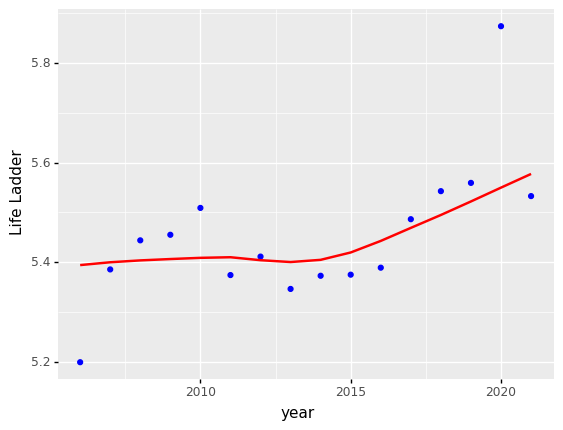

<ggplot: (-9223372036532789928)>

In [568]:
df1= dataHistorical.groupby(['year'], sort=True)['Life Ladder'].mean()
df1 =pd.DataFrame(df1)
df = df1.reset_index(drop=False)
df.columns
df=df.drop(df.index[0]) #drop data from 2005 because only containe 1 row
app = pd.DataFrame({"year":[2021],"Life Ladder":[5.532838926174497]})
df = df.append(app)
print(df)
ggplot(df,aes(x="year",y="Life Ladder"))+geom_point(color = "blue") + geom_smooth(color='red')


7) Because we have 2020 and 2021 data (2021 is the new unseen data) now has the coronavirus pandemic affected overall happiness and some of the factors within each country? 

I will look within different regions, if the average score of individual variables is increasing/decreasing but the happiness score does not reflect that. I will do this by plotting all the variables and how they have tracked over time, while overlaying how the happiness is doing over time. I will look at how the graph is trending at the end and if it shows me anything interesting.

8) Are certain regions happier than others on average? How do their individual factors differ?

Are there any countries or regions where, although the individual scores of the factors decrease, their happiness does not increase? 

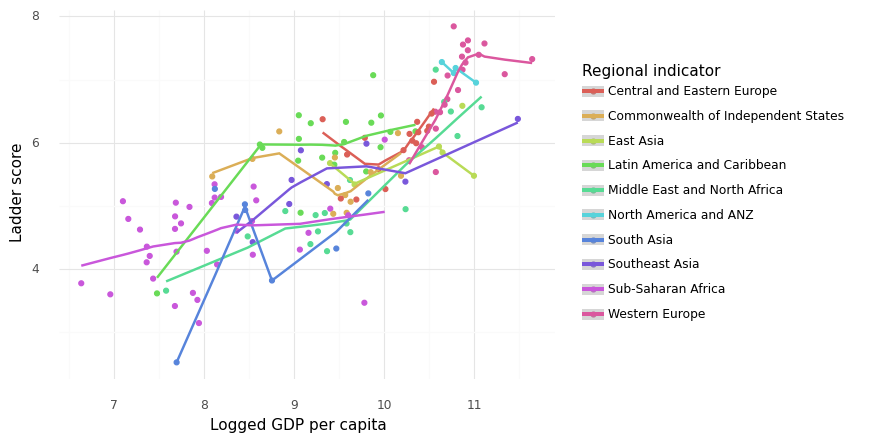

<ggplot: (-9223372036535865954)>


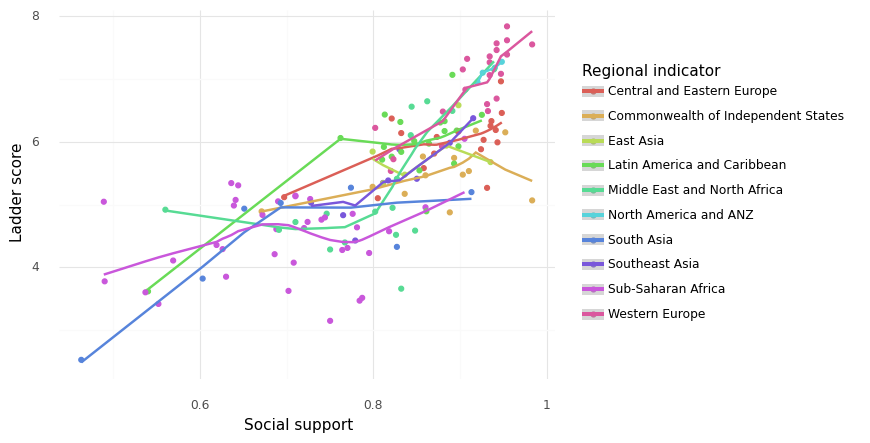

<ggplot: (-9223372036533001205)>


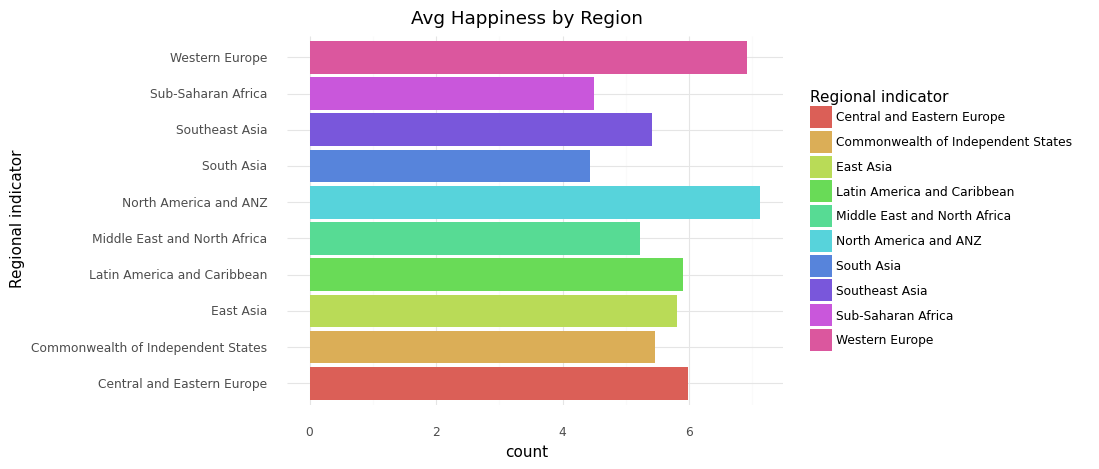

<ggplot: (325044877)>


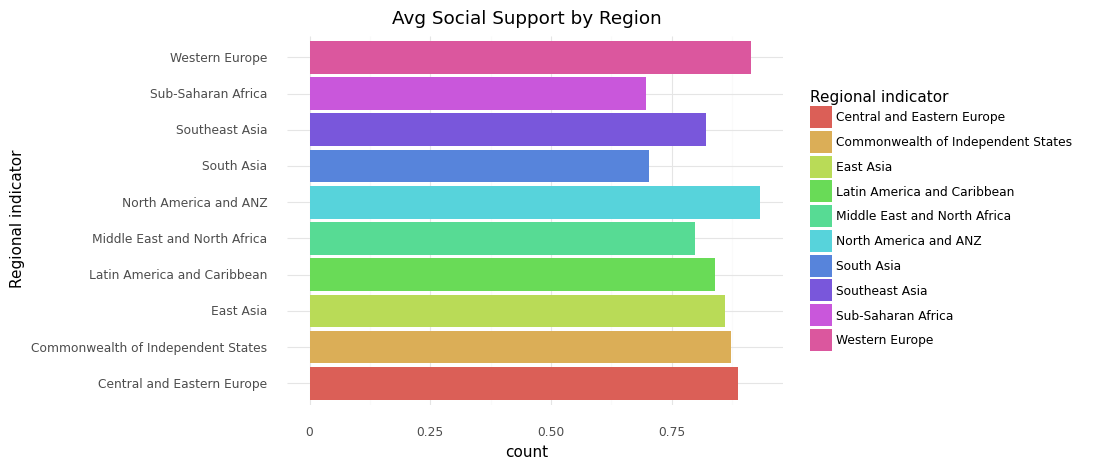

<ggplot: (-9223372036529430261)>


,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Perceptions of corruption,Generosity,Freedom to make life choices
0,Central and Eastern Europe,5.984765,10.109059,0.887412,68.338412,0.850529,-0.078941,0.797059
1,Commonwealth of Independent States,5.467000,9.401833,0.872500,65.009500,0.725083,-0.036000,0.816917
2,East Asia,5.810333,10.367667,0.860500,71.252167,0.683333,-0.062333,0.763500
3,Latin America and Caribbean,5.908050,9.370000,0.839500,67.076050,0.792600,-0.067700,0.831750
4,Middle East and North Africa,5.219765,9.666118,0.797647,65.609118,0.762235,-0.079765,0.716471
5,North America and ANZ,7.128500,10.809500,0.933500,72.325000,0.449250,0.120000,0.898750
6,South Asia,4.441857,8.682571,0.703429,62.681000,0.797429,0.042714,0.765000
7,Southeast Asia,5.407556,9.421444,0.820333,64.888444,0.709111,0.156333,0.909000
8,Sub-Saharan Africa,4.494472,8.075194,0.696750,55.886472,0.765944,0.013444,0.723194
9,Western Europe,6.914905,10.822714,0.914476,73.033095,0.523095,-0.003190,0.858714


In [607]:
df8= dataCurrent.groupby(['Regional indicator'], sort=True)['Ladder score'].mean()
df8 =pd.DataFrame(df8)
df8['Logged GDP per capita']= dataCurrent.groupby(['Regional indicator'], sort=True)['Logged GDP per capita'].mean()
df8['Social support']= dataCurrent.groupby(['Regional indicator'], sort=True)['Social support'].mean()
df8['Healthy life expectancy']= dataCurrent.groupby(['Regional indicator'], sort=True)['Healthy life expectancy'].mean()
df8['Perceptions of corruption']= dataCurrent.groupby(['Regional indicator'], sort=True)['Perceptions of corruption'].mean()
df8['Generosity']= dataCurrent.groupby(['Regional indicator'], sort=True)['Generosity'].mean()
df8['Freedom to make life choices']= dataCurrent.groupby(['Regional indicator'], sort=True)['Freedom to make life choices'].mean()



df8 = df8.reset_index(drop=False)
df8

gg8 = ggplot(dataCurrent,aes(x="Logged GDP per capita",y="Ladder score",color = "Regional indicator"))+geom_point()+stat_smooth()+theme_minimal()

gg20 = ggplot(dataCurrent,aes(x="Social support",y="Ladder score",color = "Regional indicator"))+geom_point()+stat_smooth()+theme_minimal()

gg21 = ggplot(df8,aes(x="Regional indicator",weight="Ladder score",fill = "Regional indicator"))+geom_bar()+theme_minimal()+ coord_flip() +ggtitle("Avg Happiness by Region")
gg22 = ggplot(df8,aes(x="Regional indicator",weight="Social support",fill = "Regional indicator"))+geom_bar()+theme_minimal()+ coord_flip() +ggtitle("Avg Social Support by Region")
# gg21 = ggplot(df8,aes(x="predictor", weight="COEF",fill = "Regional indicator")) +theme_minimal()+ geom_bar() + coord_flip() +ggtitle("Coefficient Size")
print(gg8)
print(gg20)
print(gg21)
print(gg22)
df8.head(15)




8) Are certain regions happier than others on average? How does social support differ by region as well? 

Yes, on average some regions are happier than others. We see that Western Europe, and North America and ANZ have the highest average happiness score. While South Asia has the lowest average happiness. As shown in the third graph, South Asian, and Sub-Saharan African also have the lowest average "Social Support" of all the regions.

The first graph shows us that within each region, if GDP per capita increases, there is slight increase of happiness score. There is no region where as GDP increases, happiness does not increase, except for a slight dip in Commonwealth of Independent States, but their trend line still finishes higher than where it started.

This same trend is visible in the second graph, as within each reagion, if social support increases, so does happiness score. There are different amounts of social support differing in each region. North America and ANZ, and Western Europe are again at the top of social support. This is probably because they have more money to fund social support systems. 

Overall, certain regions are happier, and have higher social support, being the same regions in both.

9) Are some regions more generous than others? Are these regions more wealthy or less wealthy?

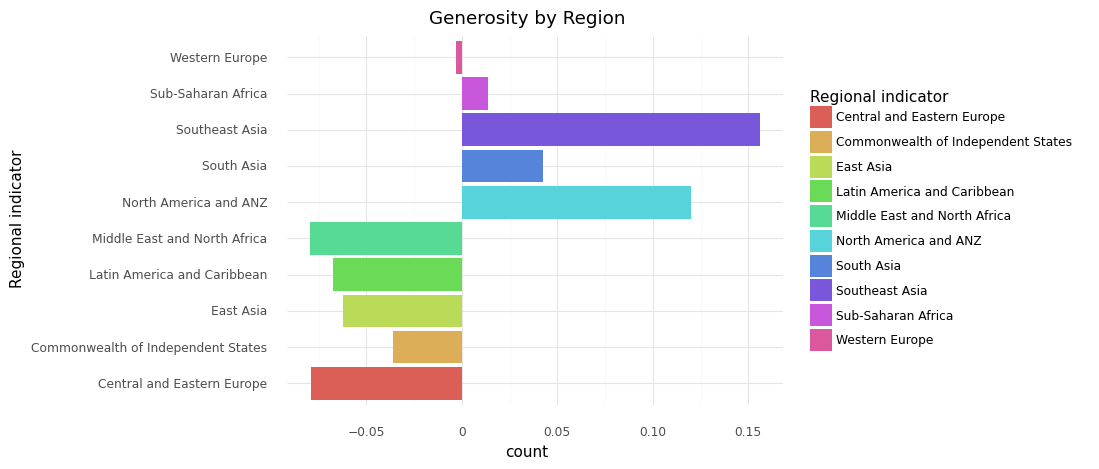

<ggplot: (-9223372036529738110)>


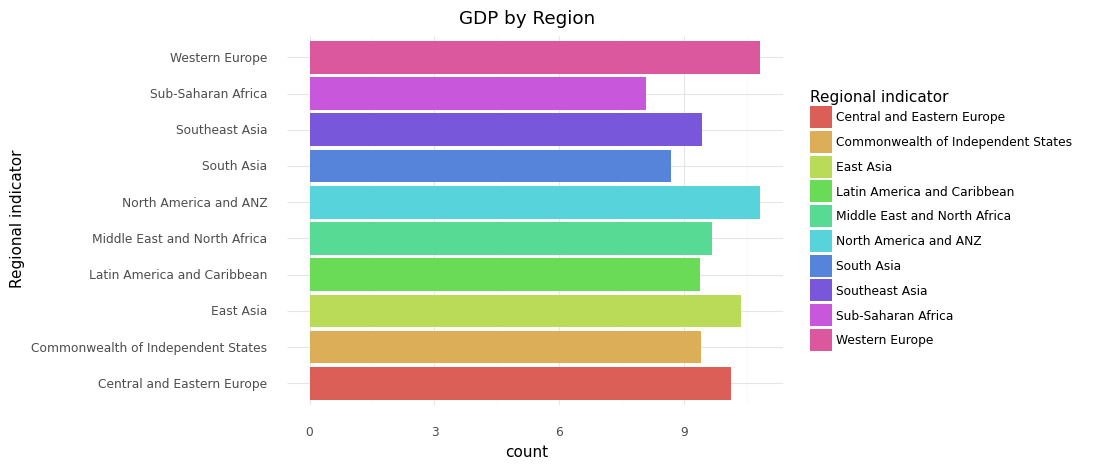

<ggplot: (322756542)>


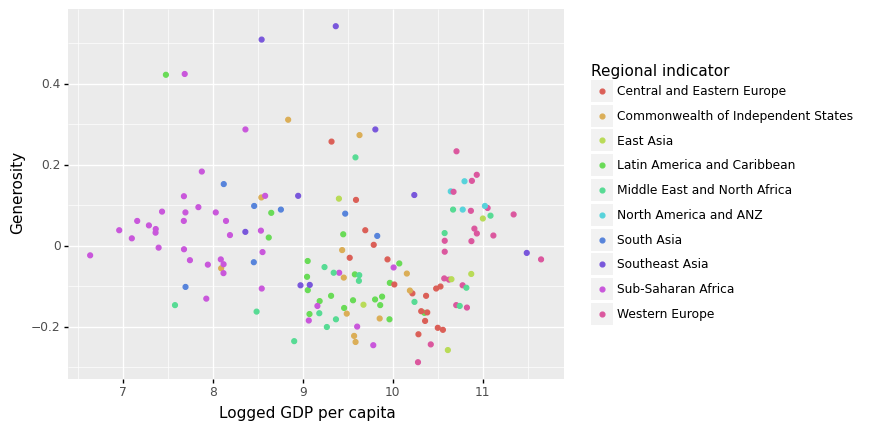

<ggplot: (-9223372036532111195)>

In [569]:
# df8
gg9=ggplot(df8,aes('Regional indicator',weight='Generosity',fill = 'Regional indicator'))+geom_bar()+theme_minimal()+ coord_flip() +ggtitle("Generosity by Region")
gg10=ggplot(df8,aes(x="Regional indicator",weight='Logged GDP per capita',fill = 'Regional indicator'))+geom_bar()+theme_minimal()+ coord_flip() +ggtitle("GDP by Region")


print(gg9)
print(gg10)
ggplot(dataCurrent,aes(x="Logged GDP per capita",y='Generosity',color='Regional indicator'))+geom_point()



9) Are some regions more generous than others? Are these regions more wealthy or less wealthy?

In the first graph, we look at average generosity rating of each region in 2021. We see that there are two regions with very high generosity, and the rest either not so high or negative. These two regions are Southeast Asia and North America and ANZ(which is Australia and New Zealand). In the second graph, we look at the Average GDP per capita of these regions, and see that Southeast Asia is not even in the top 5 for wealthiest regions by GDP. We see that Western Europe has the highest average GDP per capita but they have a slightly negative generosity score. North America and ANZ are second for average GDP/capita. We see that some regions are definitely more generous than others, with some being very un-generous, those regions being Middle East and North Africa, and Central and Eastern Europe. Central and Eastern Europe is one of the wealthier regions, but they have a very low generosity score. Looking at data from the previous question, we see that Southeast Asia is in the lower average happiness score of all the regions, but is the most generous, they must have some very generous people!!

Shown in the third graph, we see that there is not a clear relationship between GDP per capita and generosity. If you had to guess just by looking at it visually, you would guess there is slight negative correlation between GDP per capita and Generosity, so the wealthier you are the less generous you are. 

These findings likely show how peoples culture plays a large role in generosity. Logically one might think that the wealthier cultures are more generous, but this is not what the data tells us. 